# Support Vector Machines

## The Data
We will be using the famous [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). 
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Get the data


In [24]:
import seaborn as sns
iris = sns.load_dataset('iris')

## Exploratory Data Analysis

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

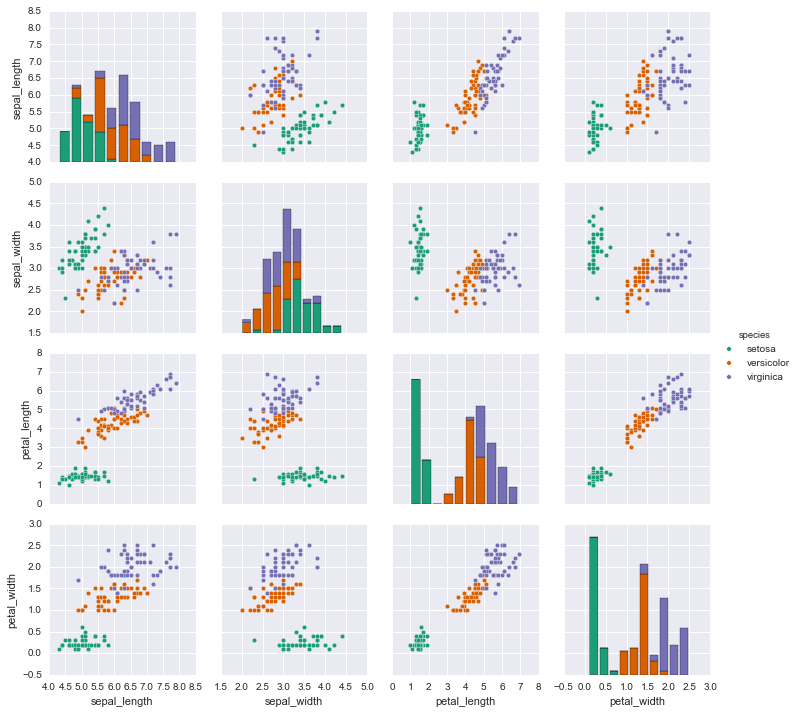

In [37]:
# Setosa is the most separable. 
sns.pairplot(iris,hue='species',palette='Dark2')

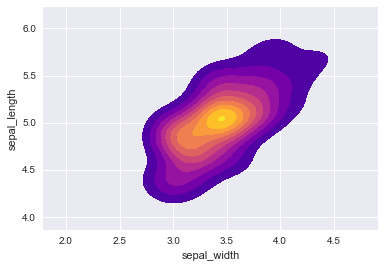

In [44]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

# Train Test Split

** Split your data into a training set and a testing set.**

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Train a Model

In [48]:
from sklearn.svm import SVC

In [49]:
svc_model = SVC()

In [50]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Model Evaluation

In [51]:
predictions = svc_model.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(confusion_matrix(y_test,predictions))

[[15  0  0]
 [ 0 13  1]
 [ 0  0 16]]


In [54]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       1.00      0.93      0.96        14
  virginica       0.94      1.00      0.97        16

avg / total       0.98      0.98      0.98        45



## Gridsearch Practice

In [55]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [58]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................................... gamma=1, C=0.1 -   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................................... gamma=1, C=0.1 -   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................................... gamma=1, C=0.1 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................................... gamma=0.1, C=0.1 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................................... gamma=0.1, C=0.1 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................................... gamma=0.1, C=0.1 -   0.0s
[CV] gamma=0.01, C=0.1 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [1, 0.1, 0.01, 0.001], 'C': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [59]:
grid_predictions = grid.predict(X_test)

In [60]:
print(confusion_matrix(y_test,grid_predictions))

[[15  0  0]
 [ 0 13  1]
 [ 0  0 16]]


In [61]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       1.00      0.93      0.96        14
  virginica       0.94      1.00      0.97        16

avg / total       0.98      0.98      0.98        45

